<a href="https://colab.research.google.com/github/msnyd/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module-2-sprint-3-LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [97]:
import math
import numpy.ma as ma

a = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def findMVS(data):
  mean = sum(data)/len(data)
  var = sum(pow(x-mean, 2) for x in data) / len(data)  #formula for variance
  std = math.sqrt(var) #std = sqroot(var)
  cov = ma.cov(ma.masked_invalid(data))

  return [mean, var, std, cov]
  # print('Mean = ', mean)
  # print('Variance = ', var)
  # print('Standard Deviation = ', std)

findMVS(a)

[3052.714285714286,
 183761.06122448976,
 428.67360686714756,
 masked_array(data=214387.90476190473,
              mask=False,
        fill_value=1e+20)]

In [59]:
#Checking work
import pandas as pd
import numpy as np

print(np.mean(a))
print(np.var(a))
print(np.std(a))


3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [60]:
b = [127, 80, 105, 92, 120, 115, 93]

print(np.cov(b))

290.95238095238096


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [61]:
findMVS(b)

[104.57142857142857,
 249.3877551020408,
 15.792015549069118,
 masked_array(data=290.95238095238096,
              mask=False,
        fill_value=1e+20)]

In [62]:
covariance

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [68]:
(findMVS(a)[3], findMVS(b)[3] / (findMVS(a)[2] * findMVS(b)[2]))

(array(214387.9047619), 0.04297912874839183)

In [75]:
np.corrcoef(a,b)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [69]:
1-0.04297912874839183

0.9570208712516082

In [0]:
#correlation = 0.96283398?

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [82]:
 df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
 df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [83]:
df.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [87]:
#FUNCTION USED TO CALC COVARIANCE
# ma.cov(ma.masked_invalid(data))

findMVS(df['pclass'])[3]

masked_array(data=0.7019691946837107,
             mask=False,
       fill_value=1e+20)

In [88]:
findMVS(df['survived'])[3]

masked_array(data=0.23624962912604577,
             mask=False,
       fill_value=1e+20)

In [98]:
findMVS(df['age'])[3]

masked_array(data=165.8500209409352,
             mask=False,
       fill_value=1e+20)

In [99]:
findMVS(df['sibsp'])[3]

masked_array(data=1.0850522026992608,
             mask=False,
       fill_value=1e+20)

In [100]:
findMVS(df['parch'])[3]

masked_array(data=0.7491945902631275,
             mask=False,
       fill_value=1e+20)

In [101]:
findMVS(df['fare'])[3]

masked_array(data=2678.95973789289,
             mask=False,
       fill_value=1e+20)

In [102]:
findMVS(df['body'])[3]

masked_array(data=9544.688567493113,
             mask=False,
       fill_value=1e+20)

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

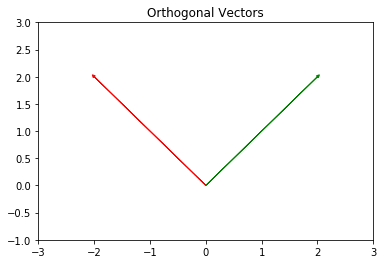

In [120]:
import matplotlib.pyplot as plt


vector_1 = np.array([-2, 2])
vector_2 = np.array([2, 2])

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

In [122]:
np.dot(vector_1, vector_2)

0

array([ 0.29683875, -0.04055364, -0.32208858])

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [123]:
a = [-5, 3, 7]

b = [6, -8, 2]

np.dot(a, b)

#these vectors are not orthoganol as the dot value is not equal to 0, therefore they do not form a right angle

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [124]:
c = [2, -15, 6, 20]

pow(LA.norm(c), 2)

665.0

In [131]:
np.dot(c, c)

665

In [130]:
ct = np.transpose(c)
np.dot(ct, c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

*Your* text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [137]:
f = [4, 12, 11, 9, 2]

LA.norm(f)

f / LA.norm(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Text(0.5, 1.0, 'Linearly Dependent Vectors')

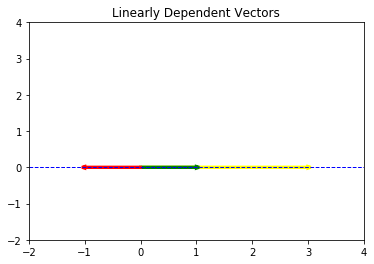

In [150]:
plt.xlim(-2,4)          
plt.ylim(-2,4)

v = [1,0] 

v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.title("Linearly Dependent Vectors")


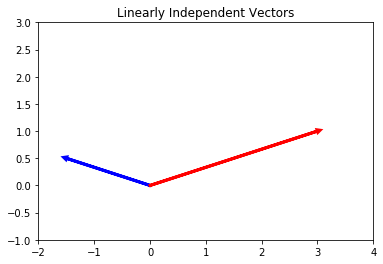

In [151]:
plt.xlim(-2,4)          
plt.ylim(-1,3)

a = [-1.5,.5] 
b = [3, 1]

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

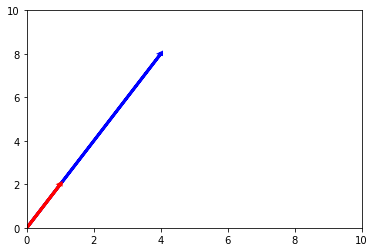

In [154]:
plt.xlim(0,10)          
plt.ylim(0,10)

b = [1,2] 
a = [4, 8]

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()


#these vectors would fail to span the space of v

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#these vectors span 3 dimensional space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# Rank = 3

## 7.2 What does the rank of a matrix tell us?

Denotes the number of independent rows in matrix.  This is important because the rank of the matrix would tell us the information content of a given matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

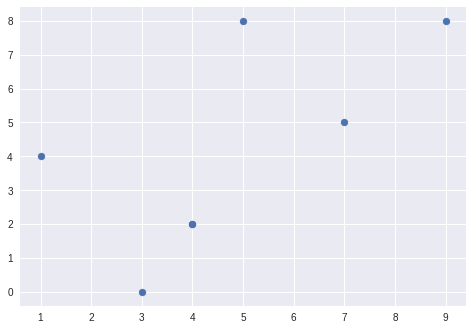

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()